In [1]:
import numpy as np
import cv2
import json
import matplotlib.pyplot as plt
from pathlib import Path

In [2]:
class Visualizer:
    X = 0
    Y = 1
    LENGTH = 2

    def __init__(
        self,
        image_path: str = "//aka/work/hara.e/AMED/lib/dataset/images",
        json_path: str = "//aka/work/hara.e/AMED/lib/dataset/annotations/annotations.json"
    ) -> None:
        self.json_path = Path(json_path)
        self.image_root = Path(image_path)
        self.categories = {1: "cyst", 2: "hcc", 3: "hemangioma", 4: "meta"}
        self.colors = [
                np.array([0.000, 0.447, 0.741]) * 255,
                np.array([0.850, 0.325, 0.098]) * 255,
                np.array([0.929, 0.694, 0.125]) * 255,
                np.array([0.494, 0.184, 0.556]) * 255,
        ]
        self.data = self._load_json(self.json_path)
        
    def visualize(self, num :int = 0) -> None:
        img_info, ann_info = self.data["images"][num], self.data["annotations"][num]
        x, y, length = int(ann_info["bbox"][Visualizer.X]), int(ann_info["bbox"][Visualizer.Y]), int(ann_info["bbox"][Visualizer.LENGTH])
        category_id = ann_info["category_id"]
        category = self.categories[category_id]

        color = self.colors[category_id - 1].astype(np.uint8)
        txt_color = (0, 0, 0) if np.mean(color) / 255 > 0.5 else (255, 255, 255)
        font = cv2.FONT_HERSHEY_SIMPLEX
        txt_size = cv2.getTextSize(category, font, 0.4, 1)[0]

        img = cv2.imread(str(self.image_root / (str(num).zfill(6) + '.jpg')))
        cv2.rectangle(img, (x, y), (x + length, y + length), color.tolist(), 2)
        cv2.rectangle(
            img,
            (x, y + 1),
            (x + txt_size[0] + 1, y + int(1.5 * txt_size[1])),
            color * 0.7,
            -1
        )
        cv2.putText(img, category, (x, y + txt_size[1]), font, 0.4, txt_color, thickness=1)
        
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.show()
        
        
    @staticmethod
    def _load_json(json_path: Path) -> dict:
        with open(json_path) as f:
            data = json.load(f)
        return data

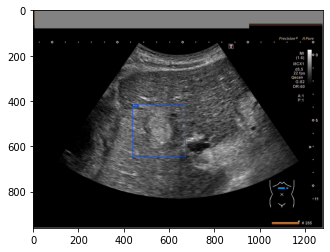

In [3]:
visualizer = Visualizer()
visualizer.visualize(814)